# MNIST Digits Classification with Machine Learning
Handwritten digit recognition using the MNIST dataset represents a fundamental challenge in computer vision and machine learning. This project focuses on solving a classic classification problem that serves as an excellent introduction to image recognition techniques. Whether you're new to machine learning or looking to strengthen your understanding of pattern recognition, this tutorial will guide you through building a digit classifier using Python.

<div align="center">
<img src="https://opendatascience.com/wp-content/uploads/2017/05/handwritten.jpg" />
</div>

## Understanding the MNIST Dataset
The MNIST (Modified National Institute of Standards and Technology) dataset consists of a comprehensive library of handwritten numerical digits. This collection serves as a standard benchmark for testing and developing image recognition algorithms. Educational institutions frequently utilize this dataset to demonstrate core machine learning classification principles. The dataset includes 60,000 training samples and 10,000 test samples, providing ample data for model development and evaluation. While the dataset can be obtained from multiple online sources, we'll leverage the convenient access provided through the Scikit-learn library for our implementation.

In the following sections, we'll explore the complete process of building a machine learning model for digit classification using Python.

## Notebook Overview
This notebook builds a multi-class classifier to predict handwritten digits from the MNIST dataset. It follows an end-to-end ML workflow:
- **Importing Libraries**: Set up core scientific Python and scikit-learn utilities.
- **Data Loading**: Load the MNIST dataset from scikit-learn.
- **Data Preprocessing**: Split features/target and normalize inputs.
- **Model Building & Evaluation**: Train and compare multiple algorithms (Naive Bayes, trees/ensembles, SVM) using standard metrics and confusion matrices.
- **Model Selection**: Identify the best-performing approach (here, SVC).
- **Model Saving**: Train the best model on the entire dataset and persist it with joblib.
- **Conclusion**: Summarize findings and outline next steps and deployment notes.

## 1. Importing Libraries
First, let's import the necessary libraries.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings

### Configuration
- Ignore warnings for cleaner output.
- Set default figure size to 12x8 inches for plots.

In [15]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Loading the MNIST Dataset
We'll load the MNIST dataset using the `fetch_openml` function from the `sklearn.
tasets` module. This function returns a dictionary-like object containing the dataset.

In [16]:
mnist = fetch_openml('mnist_784')

In [17]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Dataset Structure
The dataset contains the following keys:
- `data`: A numpy array of shape (70000, 784) containing the 28x28 pixel values of the images.
- `target`: A numpy array of shape (70000,) containing the labels of the images.
- `feature_names`: A list of strings containing the names of the features.
- `DESCR`: A string containing the description of the dataset.
- `details`: A dictionary containing the details of the dataset.

Let's assign the data and target to x and y variables.

In [30]:
x, y = mnist['data'].values, mnist['target'].values

In [31]:
x.shape, y.shape

((70000, 784), (70000,))

## 3. Visualizing the Dataset
Let's visualize the dataset.

First, let's visualize the first digit in the dataset.

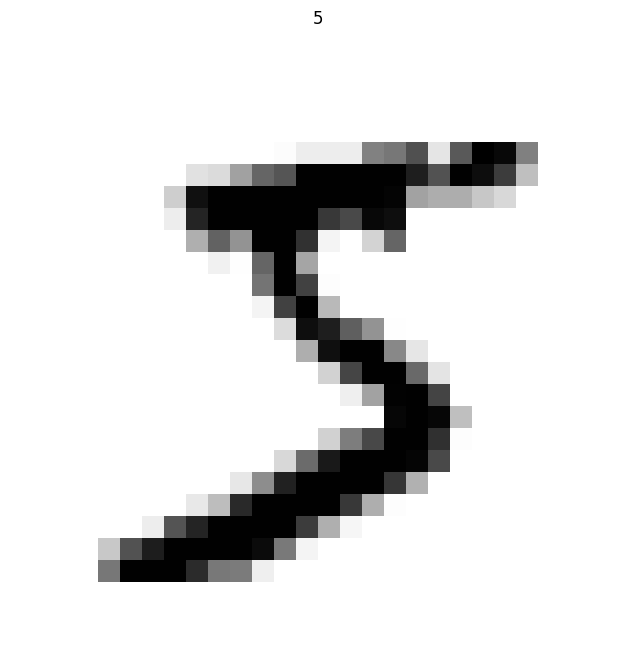

In [33]:
plt.imshow(x[0].reshape(28, 28), cmap='binary')
plt.title(y[0])
plt.axis('off')
plt.show()

Let's define a function to display random 25 digits from the dataset.

In [41]:
def display_random_digits():
    random_indices = np.random.randint(0, len(x), 25)
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(random_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[idx].reshape(28, 28), cmap='binary')
        plt.title(y[idx])
        plt.axis('off')
    plt.suptitle('Random Digits from MNIST Dataset')
    plt.tight_layout()
    plt.show()

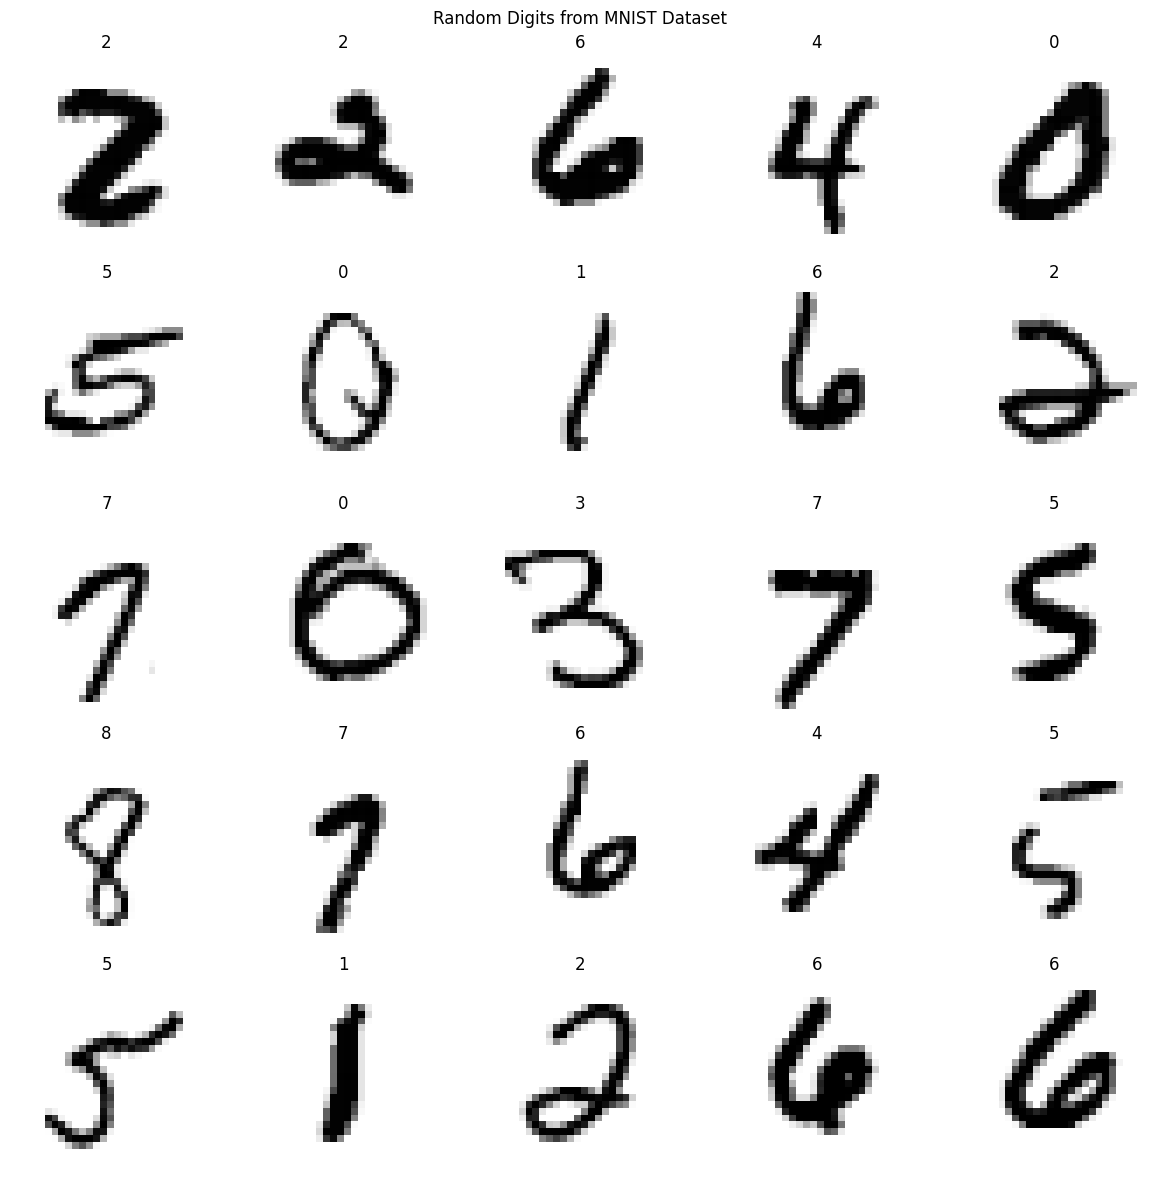

In [42]:
display_random_digits()

## 4. Data Preprocessing
Let's normalize and split the data into training and testing sets.

In [ ]:
# With division by 255, we can normalize the data to the range [0, 1] for each pixel.
x = x / 255.0

In [55]:
# Let's split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5. Modeling
Let's train machine learning models to classify the digits.

In [ ]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

def evaluate(x_train, y_train, x_test, y_test):
    results = []

    for i, (model_name, model) in enumerate(tqdm(models.items())):
        print(f'Training {model_name}...')
        y_pred = model.fit(x_train, y_train).predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        plt.subplot(3, 3, i+1)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
    plt.suptitle('Confusion Matrices of All Models')
    plt.tight_layout()
    
    report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

  0%|          | 0/7 [00:00<?, ?it/s]

Training GaussianNB...
Training MultinomialNB...
Training BernoulliNB...
Training ExtraTreesClassifier...
Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training SVC...


,Model,Accuracy,Precision,Recall,F1 Score
0,SVC,0.976429,0.976361,0.976267,0.976296
1,ExtraTreesClassifier,0.970357,0.970267,0.970179,0.970201
2,RandomForestClassifier,0.967571,0.967422,0.967460,0.967416
3,DecisionTreeClassifier,0.873500,0.871842,0.871714,0.871713
4,BernoulliNB,0.834857,0.835874,0.831701,0.832648
5,MultinomialNB,0.828071,0.834405,0.824625,0.826425
6,GaussianNB,0.551571,0.673260,0.541466,0.496388


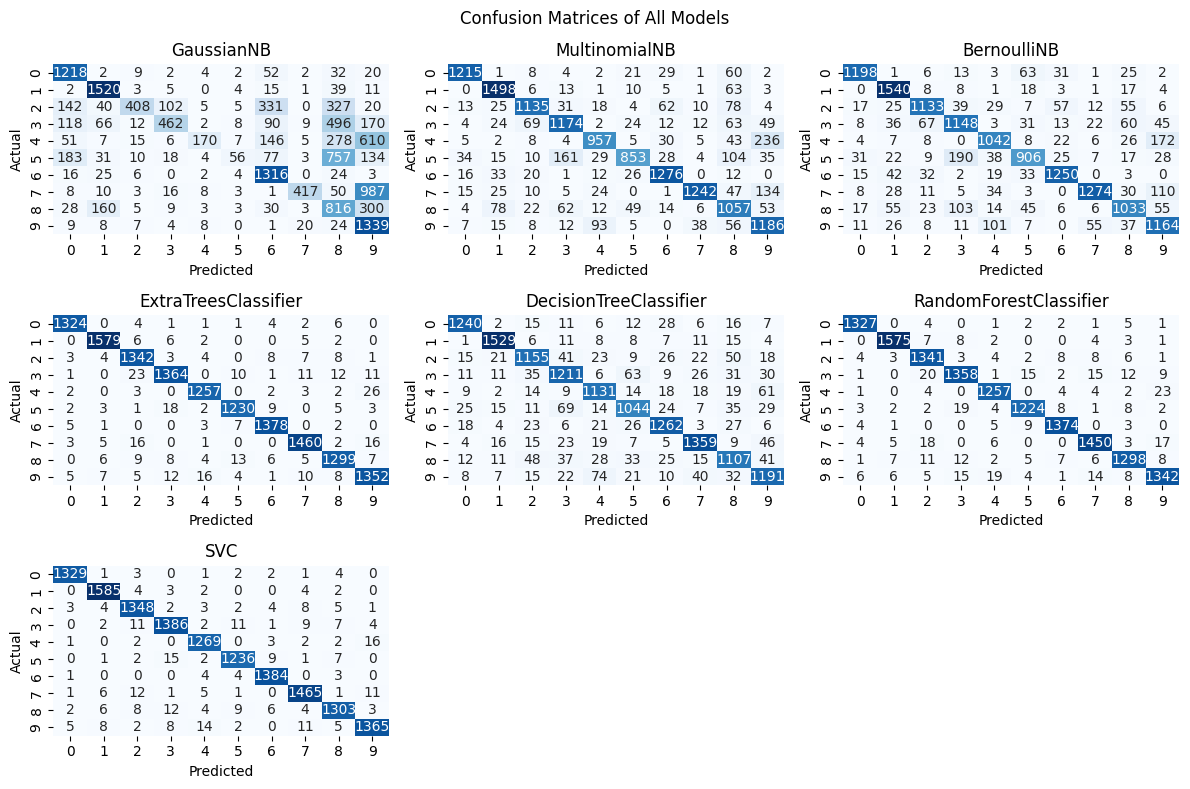

In [69]:
evaluate(x_train, y_train, x_test, y_test)

The best model is SVC with an accuracy of 0.976429. We can use this model to classify the digits.

## 6. Saving the Model
Let's train the best model on the entire dataset and save it.

In [70]:
%%time
model = SVC()
model.fit(x, y)

CPU times: user 5min 20s, sys: 2.32 s, total: 5min 22s
Wall time: 5min 19s


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [71]:
y_pred = model.predict(x)

In [72]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6903
           1       0.99      1.00      0.99      7877
           2       0.99      0.99      0.99      6990
           3       0.99      0.99      0.99      7141
           4       0.99      0.99      0.99      6824
           5       0.99      0.99      0.99      6313
           6       0.99      1.00      0.99      6876
           7       0.99      0.99      0.99      7293
           8       0.99      0.99      0.99      6825
           9       0.99      0.98      0.98      6958

    accuracy                           0.99     70000
   macro avg       0.99      0.99      0.99     70000
weighted avg       0.99      0.99      0.99     70000



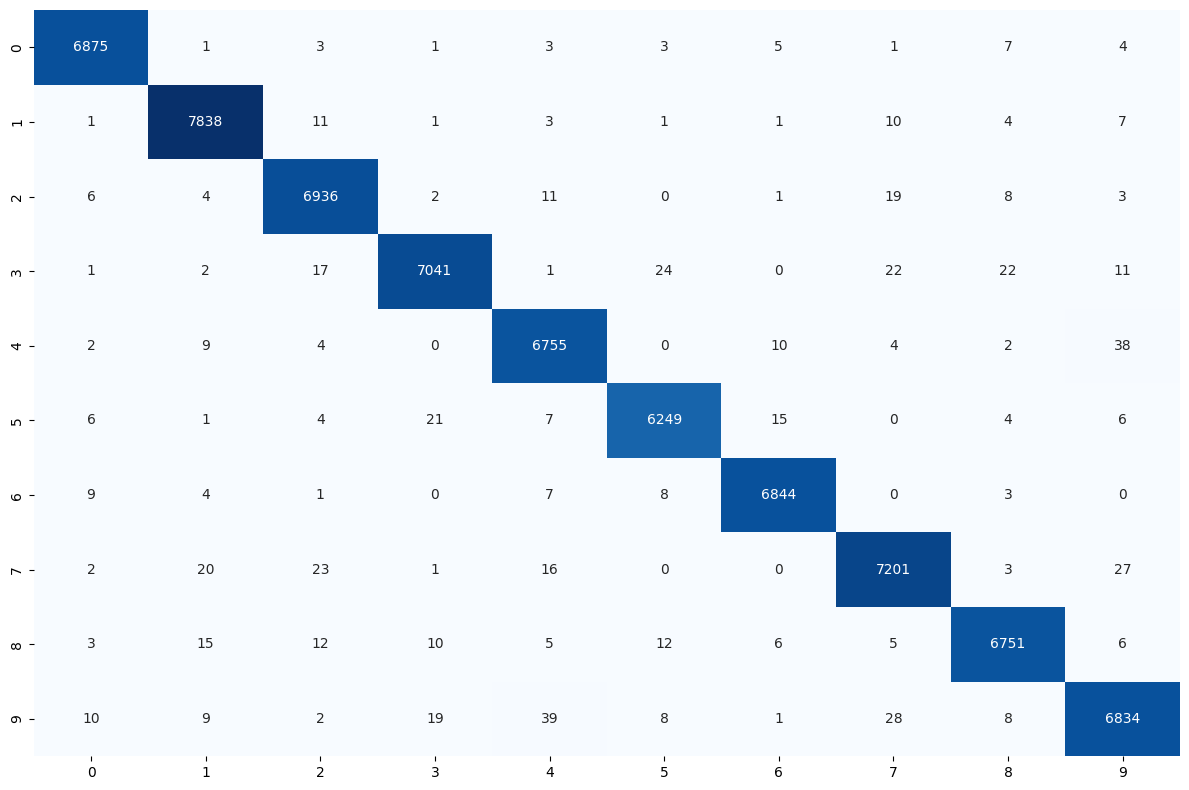

In [77]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.tight_layout()
plt.show()

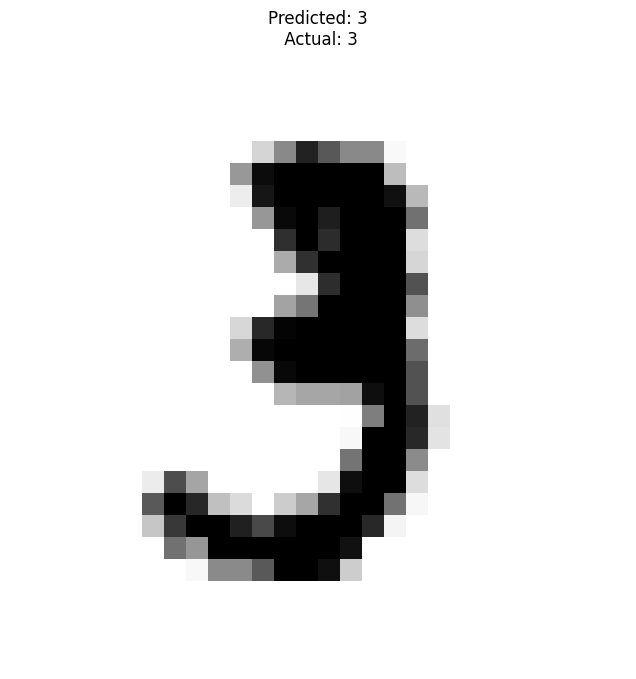

In [84]:
plt.imshow(x[10].reshape(28, 28), cmap='binary')
plt.title(f"Predicted: {model.predict(x[10].reshape(1, -1))[0]}\n Actual: {y[10]}")
plt.axis('off')
plt.show()

In [79]:
joblib.dump(model, 'mnist_svc_model.pkl')

['mnist_svc_model.pkl']

## 7. Conclusion
This project implemented an end-to-end MNIST digit classification pipeline: loading data,
visualizing samples, normalizing features, training multiple classical ML models, and
evaluating them with accuracy, precision, recall, F1, and confusion matrices. SVC achieved
the best test performance (~0.976 accuracy), showing that strong baselines can be built
without deep learning when data is well-structured and preprocessed.

Key insights:
- Simple normalization (pixel/255) was sufficient for classical models to perform well.
- Errors concentrated on visually similar digits (e.g., 4/9, 3/5), visible in confusion matrices.
- Macro-averaged metrics provided a balanced view across classes beyond overall accuracy.

Future improvements:
- Explore CNNs (e.g., PyTorch/TensorFlow) to push accuracy beyond classical methods.
- Perform hyperparameter tuning (SVC C/gamma, RF trees) and cross-validation.
- Apply data augmentation (shifts/rotations) and dimensionality reduction (PCA) for speed.
- Calibrate probabilities and add a simple deployment/inference script or API.